In [28]:
#importing the wanted libraries 
%matplotlib inline
import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
import skimage
from skimage.morphology import disk
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku 
from skimage.io import imread

In [29]:
#defining a function of presenting the image
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

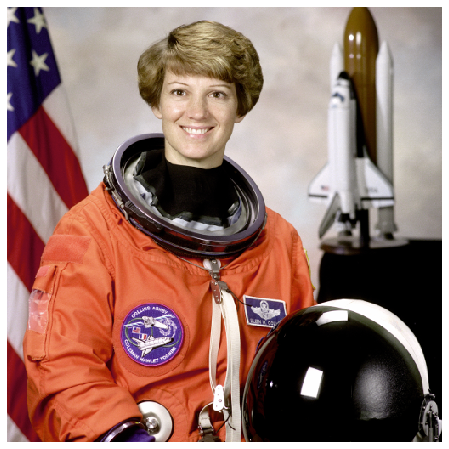

In [30]:
#Color image of the astronaut Eileen Collins
img=skid.astronaut()
show(img)

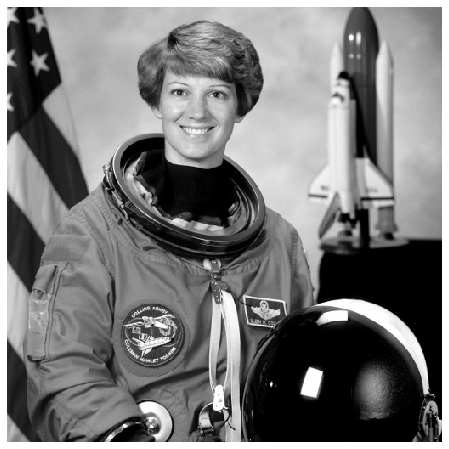

In [31]:
#converts the truecolor image RGB to the grayscale image
img_test = skic.rgb2gray(skid.astronaut())
show(img_test)

In [32]:
#defining a function of changing the noise of the picture - median filter
def f(Median_Size):
    selem = disk(int(Median_Size))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_median = skif.rank.median(img_test, selem=selem) 

    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)

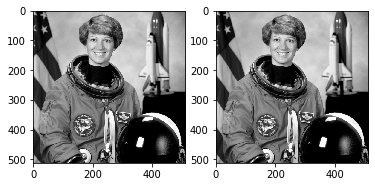

In [33]:
#plotting the images
fig = plt.figure(figsize=(6, 4))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(img_test, cmap="gray")
ax_neu.imshow(img_test, cmap="gray")


In [34]:
#addting a slider to adjust the noise of the image
interact(f, Median_Size=widgets.IntSlider(min=1,max=21,step=2,value=1));

interactive(children=(IntSlider(value=1, description='Median_Size', max=21, min=1, step=2), Output()), _dom_cl…

<function f(Median_Size)>

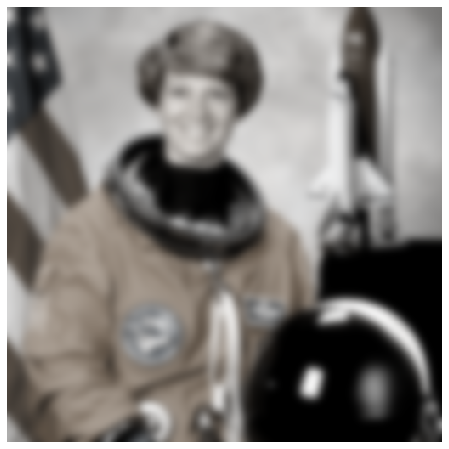

In [36]:
#Gaussian filter that returns ndarray 
img_gaussian = skif.gaussian(img, 5., multichannel=False)
show(img_gaussian)

In [20]:
#fig = plt.figure(figsize=(6, 4))
#ax_orig = fig.add_subplot(121) 
#ax_neu = fig.add_subplot(122) 

#ax_orig.imshow(img_test)
#ax_neu.imshow(img_test)

In [21]:
#interact(f, Median_Size=widgets.IntSlider(min=1,max=21,step=2,value=1));

#this couldn't be implemented on the specific img_gaussian because the picture is not in the 2d array format 

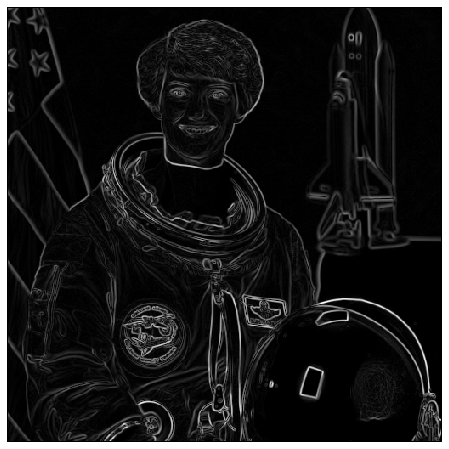

In [24]:
#finding the edge magnitude using the Sobel transform 
img = skic.rgb2gray(skid.astronaut())
sobimg = skif.sobel(img)
show(sobimg)

In [38]:
#implementing slider to adjusted the edge magnitude 
@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _do…

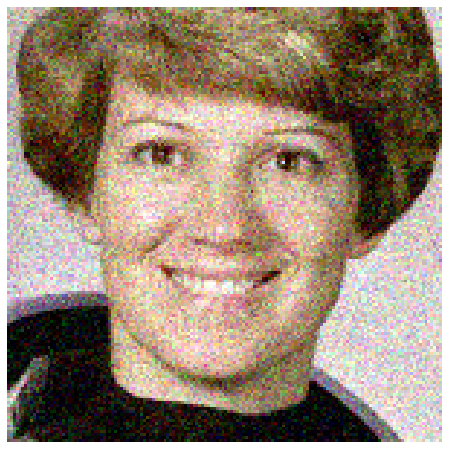

In [26]:
img = skimage.img_as_float(skid.astronaut())

# We take a portion of the image to show the details.
img = img[50:200, 150:300]

# We add Gaussian noise.
img_n = sku.random_noise(img)
show(img_n)

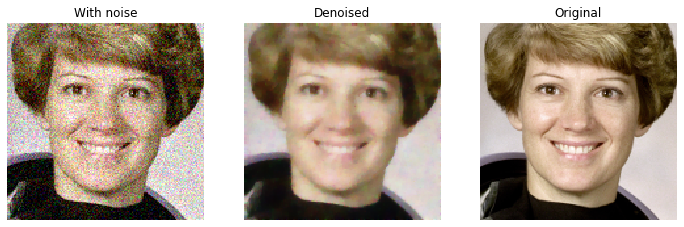

In [27]:
img_r = skimage.restoration.denoise_tv_bregman(img_n, 5.)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

ax1.imshow(img_n)
ax1.set_title('With noise')
ax1.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.set_axis_off()

ax3.imshow(img)
ax3.set_title('Original')
ax3.set_axis_off()